# Data Cleaning Exercise: Handling Missing Values and Outlier Detection

## Introduction
In this exercise, we will explore techniques for data cleaning, focusing on handling missing values and detecting outliers.
Data cleaning is a crucial step in data analytics to ensure high-quality data for analysis and modeling.


## Step 1: Importing Required Libraries
We start by importing the necessary Python libraries for data analysis.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Step 2: Loading the Dataset
For this exercise, we will use a sample dataset with missing values and outliers.

In [85]:
# Creating a sample dataset
np.random.seed(42)

data = pd.read_csv('/Users/aamtayag/Desktop/MSE/MSE803-DA/Week#8/House_Data.csv')

#data = {
#    'Age': np.random.randint(18, 70, 50).tolist() + [200],  # Adding an outlier
#    'Salary': np.random.randint(30000, 100000, 50).tolist() + [500000],  # Adding an outlier
#    'Experience': np.random.randint(0, 40, 50).tolist() + [100],  # Adding an outlier
#}
df = pd.DataFrame(data)

# Introducing some missing values
#df.loc[5, 'Age'] = np.nan
#df.loc[10, 'Salary'] = np.nan
#df.loc[15, 'Experience'] = np.nan

df.info()
#df.shape()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   society        7818 non-null   object 
 4   total_sqft     13320 non-null  object 
 5   bath           13247 non-null  float64
 6   balcony        12711 non-null  float64
 7   price          13320 non-null  float64
 8   site_location  13319 non-null  object 
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [98]:
# Find duplicate rows
duplicates = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicates)
df.head()

Duplicate Rows:
                  area_type   availability       size  society total_sqft  \
7025   Super built-up  Area  Ready To Move      2 BHK                1000   
8295   Super built-up  Area  Ready To Move      3 BHK                1290   
9314   Super built-up  Area  Ready To Move      4 BHK  Prtanha       3122   
9483             Plot  Area  Ready To Move  2 Bedroom                 900   
9502   Super built-up  Area  Ready To Move      3 BHK                1464   
9815   Super built-up  Area         18-Aug      2 BHK                1225   
10771        Built-up  Area         18-Dec      2 BHK                1200   
11065  Super built-up  Area  Ready To Move      3 BHK  DSerste       1362   
11457  Super built-up  Area         18-Dec      2 BHK                 900   
12137  Super built-up  Area  Ready To Move      2 BHK  RInceeg       1243   
12422  Super built-up  Area         18-Jul      4 BHK  Rosha I       2119   

       bath  balcony   price           site_location  
7025

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,,1200,2.0,1.0,51.00,Aundh Road


## Step 3: Handling Missing Values
Missing values can be handled by either removing or imputing them. Let's explore both methods.

In [79]:
# Checking for missing values
df.isnull().sum(), df.isnull().sum() * 100 / len(df)

(area_type           0
 availability        0
 size               16
 society          5502
 total_sqft          0
 bath               73
 balcony           609
 price               0
 site_location       1
 dtype: int64,
 area_type         0.000000
 availability      0.000000
 size              0.120120
 society          41.306306
 total_sqft        0.000000
 bath              0.548048
 balcony           4.572072
 price             0.000000
 site_location     0.007508
 dtype: float64)

In [95]:
# Imputing missing values with the median
df['size'].fillna('', inplace=True)
df['society'].fillna('', inplace=True)
df['bath'].fillna(df['bath'].median(), inplace=True)
df['balcony'].fillna(df['balcony'].median(), inplace=True)
df['site_location'].fillna('', inplace=True)
df.isnull().sum()  # Verifying if missing values are handled

area_type        0
availability     0
size             0
society          0
total_sqft       0
bath             0
balcony          0
price            0
site_location    0
dtype: int64

## Step 4: Detecting Outliers
Outliers can be detected using various techniques such as boxplots and Z-scores.
We will use the IQR method and Z-score method.

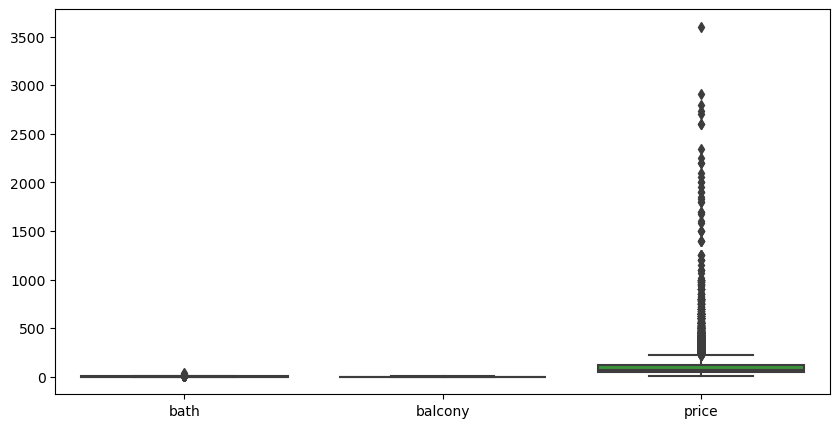

In [96]:
# Using Boxplot to visually identify outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.show()

In [100]:
# Detecting outliers using the IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
#print(Q1,Q3,IQR)
outliers =df[(df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR))]
#df[outliers].dropna()
print(outliers)

                  area_type   availability       size  society total_sqft  \
7      Super built-up  Area  Ready To Move      4 BHK  Brway G       3300   
9                Plot  Area  Ready To Move  6 Bedroom                1020   
11               Plot  Area  Ready To Move  4 Bedroom  Prrry M       2785   
18     Super built-up  Area  Ready To Move      3 BHK  PeBayle       2770   
22               Plot  Area  Ready To Move  4 Bedroom  Soitya        2800   
...                     ...            ...        ...      ...        ...   
13306            Plot  Area  Ready To Move  4 Bedroom                1200   
13311            Plot  Area  Ready To Move  7 Bedroom                1500   
13315        Built-up  Area  Ready To Move  5 Bedroom  ArsiaEx       3453   
13316  Super built-up  Area  Ready To Move      4 BHK                3600   
13318  Super built-up  Area         18-Jun      4 BHK  SollyCl       4689   

       bath  balcony  price site_location  
7       4.0      2.0  600.0    

In [101]:
# Removing outliers using the IQR method
df_cleaned = df[~((df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR)))]
df_cleaned.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,,1200,2.0,1.0,51.00,Aundh Road


## Step 5: Conclusion
In this exercise, we:
- Loaded a dataset with missing values and outliers.
- Handled missing values by imputation.
- Used boxplots and the IQR method to detect and remove outliers.
Now, try experimenting with different datasets and methods to enhance your data cleaning skills!